In [2]:
import scanpy as sc
import graph_tool.all as gt
import scnsbm
import pandas as pd
import anndata
import pickle
import mygene
import scipy.stats
%pylab
%matplotlib inline

/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/all.py:40: RuntimeWarning: Error im

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
adatae=sc.read('../scRNA_paga/state_adata/Quartzseq_equilibrate.h5ad')
adatae2=sc.read('../scRNA_paga/state_adata/Quartzseq_equilibrate2.h5ad')
adatae3=sc.read('../scRNA_paga/state_adata/Quartzseq_equilibrate3.h5ad')
adatam=sc.read('../scRNA_paga/state_adata/Quartzseq_minimize.h5ad')
adatam2=sc.read('../scRNA_paga/state_adata/Quartzseq_minimize2.h5ad')
adatam3=sc.read('../scRNA_paga/state_adata/Quartzseq_minimize3.h5ad')


In [3]:
cell_affinity=list()
for i in range(len(adatam.uns['nsbm']['cell_affinity']['2'])):
    val=dict()
    cell=[]
    for j in range(len(adatam.uns['nsbm']['cell_affinity']['2'][i])):
        buff=[x for x in adatam.uns['nsbm']['cell_affinity']['2'][i]]
        if adatam.uns['nsbm']['cell_affinity']['2'][i][j]== max(adatam.uns['nsbm']['cell_affinity']['2'][i]):
            val[j]=val.get('j', adatam.uns['nsbm']['cell_affinity']['2'][i][j])
            buff.pop(j)
        if adatam.uns['nsbm']['cell_affinity']['2'][i][j]<0.95:
            for e in range(len(adatam.uns['nsbm']['cell_affinity']['2'][i])):
                if adatam.uns['nsbm']['cell_affinity']['2'][i][e]== max(buff):
                    val[e]=val.get('j', adatam.uns['nsbm']['cell_affinity']['2'][i][e])        
    cell.append(val)   
    cell_affinity.append(cell)

In [4]:
cell_affinity

[[{7: 0.7606734041661959, 0: 0.23932659583380403}],
 [{0: 0.9998846887842722}],
 [{1: 1.0}],
 [{1: 1.0}],
 [{2: 1.0}],
 [{0: 0.99999930669189}],
 [{1: 1.0}],
 [{3: 0.9999466720711627}],
 [{4: 1.0}],
 [{5: 1.0}],
 [{0: 0.711222530812852, 3: 0.28877699836071447}],
 [{6: 0.9999999999979122}],
 [{3: 0.9999997633343285}],
 [{1: 1.0}],
 [{7: 1.0}],
 [{8: 1.0}],
 [{5: 0.8983914167156354, 6: 0.10160858328417481}],
 [{8: 0.9999997816889798}],
 [{8: 1.0}],
 [{5: 0.9999999980472039}],
 [{6: 0.9999999865186424}],
 [{8: 1.0}],
 [{3: 0.9999923250268564}],
 [{5: 0.9999999999999929}],
 [{9: 1.0}],
 [{4: 1.0}],
 [{8: 0.9999999941328939}],
 [{10: 0.9999999999952218}],
 [{0: 0.9999999999999999}],
 [{10: 1.0}],
 [{3: 0.9999999997965084}],
 [{11: 0.9997057707757777}],
 [{2: 1.0}],
 [{8: 1.0}],
 [{1: 1.0}],
 [{1: 1.0}],
 [{8: 1.0}],
 [{4: 0.9995357473931114}],
 [{7: 0.9999999996242153}],
 [{4: 1.0}],
 [{5: 0.9976631576457305}],
 [{7: 1.0}],
 [{7: 0.9999999686306642}],
 [{1: 0.9999999999999677}],
 [{2: 0.999

In [15]:
M=adatam.uns['nsbm']['cell_affinity']['3']

In [16]:
adatam.obs['max_u'] = 1 - np.max(M, axis=1) 

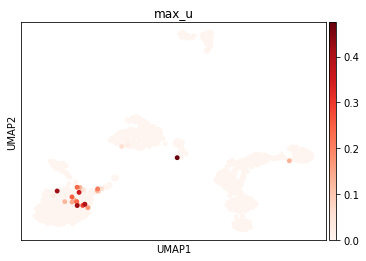

In [17]:
sc.pl.umap(adatam, color ='max_u',color_map='Reds')

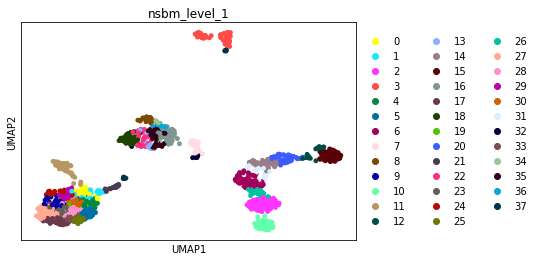

In [31]:
sc.pl.umap(adatam,color='nsbm_level_1')

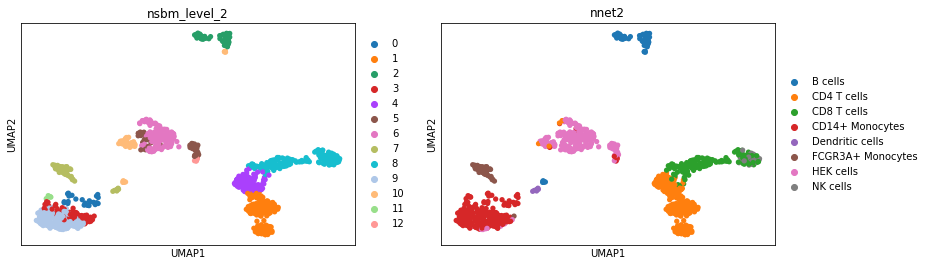

In [36]:
sc.pl.umap(adatam[adatam.obs.max_u < 1e-10], color=['nsbm_level_2','nnet2'])

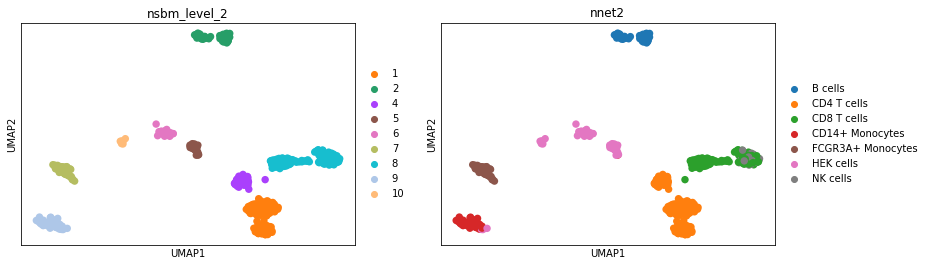

In [4]:
M=adatam.uns['nsbm']['cell_affinity']['2']
adatam.obs['max_u'] = 1 - np.max(M, axis=1) 
sc.pl.umap(adatam[adatam.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2'])

Trying to set attribute `.uns` of view, copying.


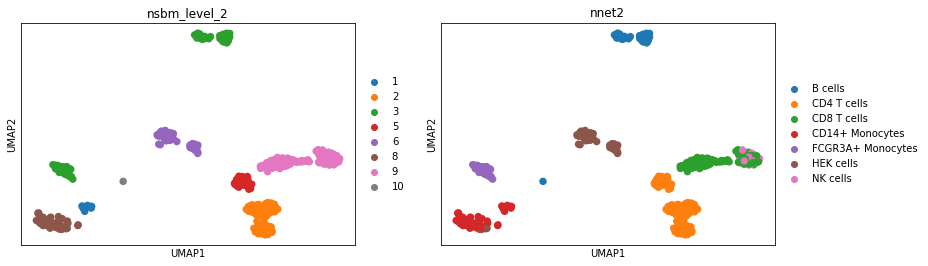

In [5]:
M=adatam2.uns['nsbm']['cell_affinity']['2']
adatam2.obs['max_u'] = 1 - np.max(M, axis=1) 
sc.pl.umap(adatam2[adatam2.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2'])

Trying to set attribute `.uns` of view, copying.


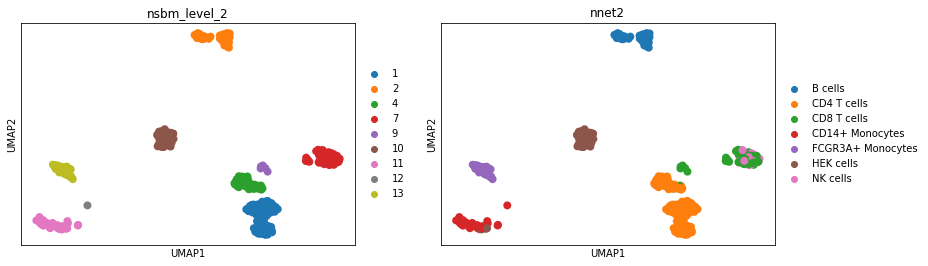

In [6]:
M=adatam3.uns['nsbm']['cell_affinity']['2']
adatam3.obs['max_u'] = 1 - np.max(M, axis=1) 
sc.pl.umap(adatam3[adatam3.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2'])

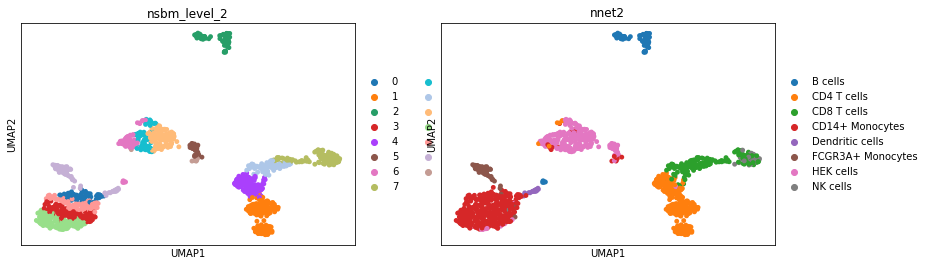

In [7]:
sc.pl.umap(adatam3, color=['nsbm_level_2','nnet2'])